# Assignment 8 - High Frequency Words


## Problem Description

Please answer the following questions in an IPython Notebook, posted to GitHub. 

1. Choose a corpus of interest. 
2. How many total unique words are in the corpus?  (Please feel free to define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus? 
4. Identify the 200 highest frequency words in this corpus. 
5. Create a graph that shows the relative frequency of these 200 words. 
6. Does the observed relative frequency of these words follow Zipf’s law?  Explain. 
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.” 

## Solution

In [171]:
# Importing required libraries/packages
import nltk
#from nltk.corpus import names
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt

For this assignment, we will take genesis dataset which is avaliable in the NLTK corpus. Genesis is a small part of text from the Bible. Also it is availble in different languages. For this current analysis, we will take only the corpus available in English.

In [33]:
gen = nltk.corpus.genesis
gen.fileids()

In [231]:
# Below are the list of languages available in Genesis corpus
gen.fileids()

['english-kjv.txt',
 'english-web.txt',
 'finnish.txt',
 'french.txt',
 'german.txt',
 'lolcat.txt',
 'portuguese.txt',
 'swedish.txt']

In [234]:
#Seeing the first two lines in the english corpus
gen.raw('english-kjv.txt')[:200]

'In the beginning God created the heaven and the earth.\nAnd the earth was without form, and void; and darkness was\nupon the face of the deep. And the Spirit of God moved upon\nthe face of the waters.\nAn'

<b>How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).</b>

To get the total unique words, we have to perform some steps.

1. Remove any symbols and numbers. Keep only the english characters.
2. Stemming the corpus via Porter algorithm.
3. Remove the english stopwords. It can be done with the help of existing corpus.

In [104]:
tokenize = nltk.word_tokenize(gen.raw('english-kjv.txt'))

#Remove all the symbols in the tokenized dataset
words= [word.lower() for word in tokenize if word.isalpha()]

# Unique words in the corpus
unique_words = list(set(words))

In [98]:
# Perform stemming and remove stopwords
porter = PorterStemmer()
filtered_words = [porter.stem(t) for t in unique_words]
filtered_words = [word for word in filtered_words if word not in stopwords.words('english')]

In [107]:
print("Length of corpus words: {}".format(len(tokenize)))
print("Length of corpus sentences: {}".format(len(gen.sents())))
print("Length of unique words with stopwords: {}".format(len(unique_words)))
print("Length of unique words after stemming and stopwords: {}".format(len(filtered_words)))


Length of corpus words: 44502
Length of corpus sentences: 13640
Length of unique words with stopwords: 2614
Length of unique words after stemming and stopwords: 2505


<b>Taking the most common words, how many unique words represent half of the total words in the corpus? </b>

To get the most common words, we need to convert the dataset to Frequency Distribution. Once we convert it, we need to sort and loop through all the frequency values in the corpus.

In [149]:
freq = nltk.FreqDist(words)

In [154]:
#Sorting the dataset as per frequency count
sorted_list = sorted(freq.items(), key =lambda item: item[1],reverse=True)[:50]

In [156]:
sums = 0
word_count = 0
for w,c in sorted_list:
    if sums <= len(words)/2:
        sums = sums + c
        word_count = word_count +1
    else:
        print("Half of total corpus are: {}".format(sums))
        print("Number of High Frequency uniqe words represent half of total corpus are: {}".format(word_count))
        break


Half of total corpus are: 19186
Number of High Frequency uniqe words represent half of total corpus are: 39


<b>Identify the 200 highest frequency words in this corpus. </b>

There is a predefined function to find the most frequently used words from the frequency distribution table. We will use the dataset which includes stopwords.

In [164]:
#Most frequent words
frequent_words_df = pd.DataFrame(freq.most_common(200))

In [167]:
frequent_words_df.columns=['Words','Frequency']

Below are the top five words. It is not a suprise list. Because all of them are stopwords. We do not have anywords specific to genesis.

In [236]:
#Top five words 
frequent_words_df.head()

,Words,Frequency
0,and,3678
1,the,2461
2,of,1364
3,he,655
4,his,653


<b>Create a graph that shows the relative frequency of these 200 words. </b>

Below are the charts of the top 200 frequently used words in the corpus. Most of the words are just stopwords. It is a big suprise and does not provide lot of information.

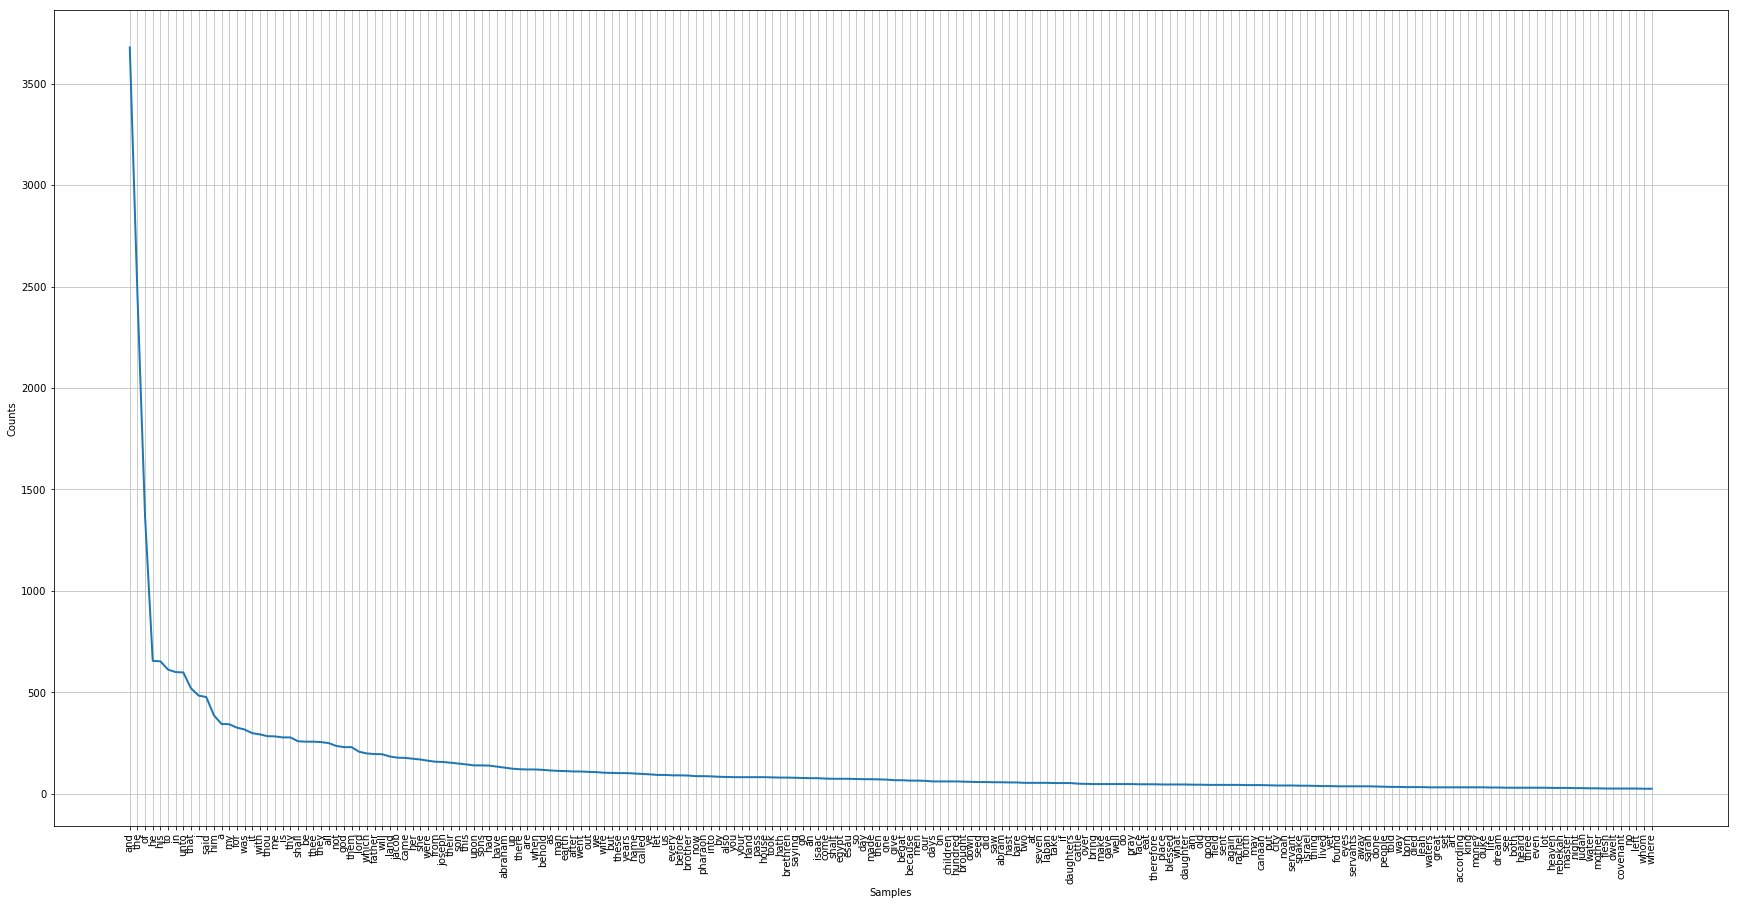

In [193]:
#Plot for 200 frequenly used words
plt.figure(figsize=(30,15))
freq.plot(200,cumulative=False)

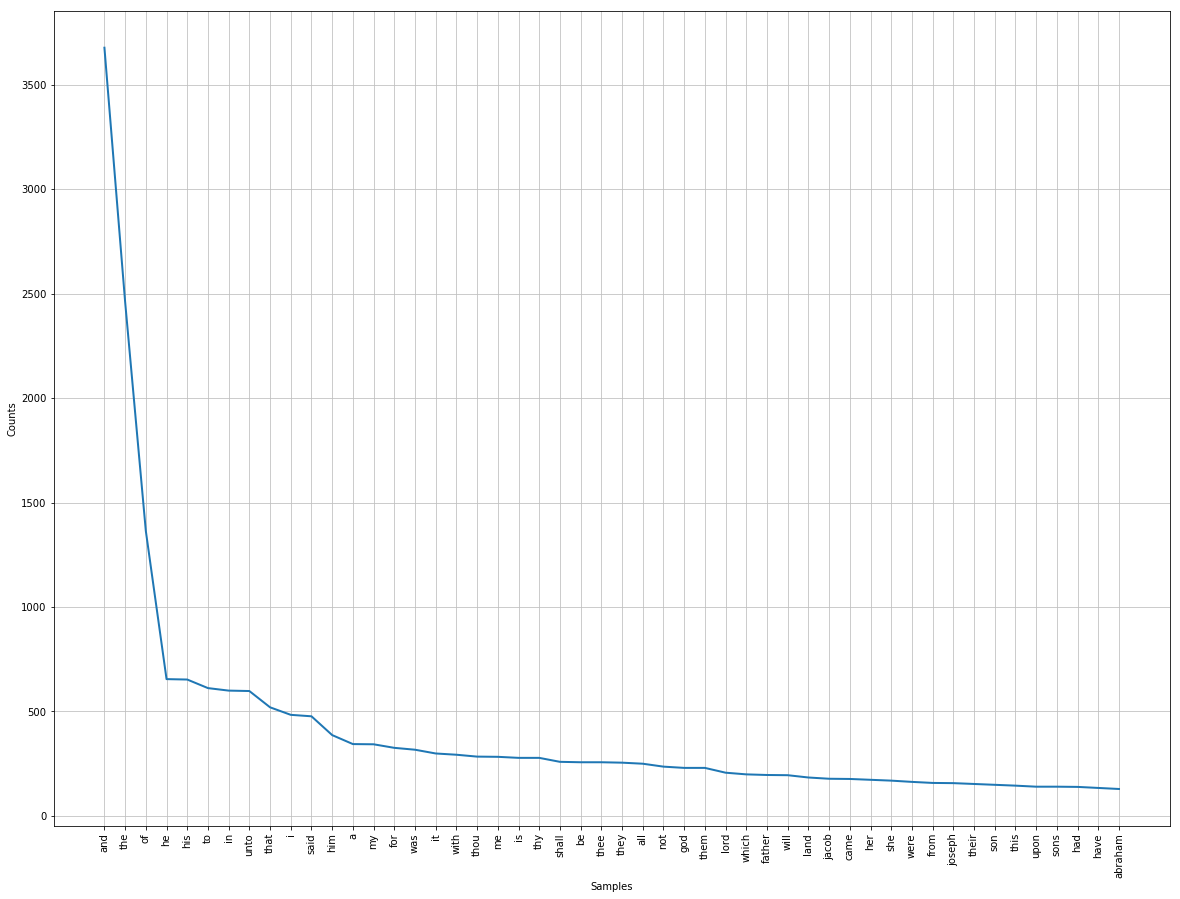

In [194]:
# Frequency of first 50 words
plt.figure(figsize=(20,15))
freq.plot(50,cumulative=False)


<b>Does the observed relative frequency of these words follow Zipf’s law?  Explain. </b>

Zipf's law states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. So word number N has a frequency of 1/N.

It seems Zipf's law holds true for the dataset which we have been using. Lets validate it in above dataset.

In [230]:
sorted_freq = sorted(freq.items(), key =lambda item: item[1],reverse=True)

In [219]:
zipf = []
for w,c in sorted_freq:
    new_c = c/len(words)*100
    zipf.append((w,new_c))

In [223]:
zipf[:10]

[('and', 9.620968374794005),
 ('the', 6.437521253498653),
 ('of', 3.5679719584608542),
 ('he', 1.7133589683224777),
 ('his', 1.708127337884852),
 ('to', 1.6008789139135213),
 ('in', 1.5694891312877657),
 ('unto', 1.56425750085014),
 ('that', 1.3602239137827303),
 ('i', 1.2660545659054645)]

In [222]:
print('As per Zipf law, the word "and" occurs {}% and the word "the" occurs {}%'.format(round(zipf[0][1]),round(zipf[1][1])))

As per Zipf law, the word "and" occurs 10% and the word "the" occurs 6%


<b>In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.” </b>

As a hidden standard, stopwords(like the, and, of, etc.) tend to occur more frequently than the other important words. This is a generally true when considering all words in all the corpus. The results which we got also proves it. Most of the frequent words were just the stopwords. 

But on some corpus, apart from stopwords there are some words which are particular to that context. But in the current analysis, we did not see many words which stands out which is particular for this corpus.